In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from first_stage_func import first_stage
from second_stage_func import second_stage

In [2]:
startdate = 0
enddate = 30
# 1 month simulation period

In [3]:
stations = pd.read_csv('datasets/station_with_demand.csv')

stations['current_bikes'] =0


In [4]:

demand_cat = ['Highest', 'Medium', 'Low', 'Lowest']

In [5]:
manhatten_bike_fleet = int(662/1915 * 37369)

In [6]:
daily_log = {}

In [7]:
stations

,station_id,station_name,capacity,lng,lat,MEAN_WEEKLY_TRIPS,NORMALISED_CAPACITY,DEMAND_SCORE,DEMAND_CATEGORY,current_bikes
0,5772.05,Morton St & Greenwich St,56,-74.008870,40.731150,0,0.441667,0.000000,Lowest,0
1,6560.15,Broadway & W 38 St,68,-73.987349,40.752973,511,0.541667,234.719333,Low,0
2,7727.07,Amsterdam Ave & W 119 St,29,-73.959621,40.808625,0,0.216667,0.000000,Lowest,0
3,6569.08,W 35 St & Dyer Ave,41,-73.997402,40.754692,206,0.316667,140.972667,Low,0
4,7023.04,W 59 St & 10 Ave,117,-73.988038,40.770513,341,0.950000,17.391000,Lowest,0
...,...,...,...,...,...,...,...,...,...,...
657,8416.10,W 186 St & St Nicholas Ave,26,-73.931308,40.852253,8,0.191667,6.474667,Lowest,0
658,4846.01,South St & Whitehall St,55,-74.012342,40.701221,313,0.433333,177.679667,Low,0
659,6890.01,W 53 St & 10 Ave,29,-73.990617,40.766697,424,0.216667,332.557333,Medium,0
660,6483.06,W 36 St & 7 Ave,38,-73.989539,40.752149,173,0.291667,122.714667,Low,0


In [8]:

while startdate < enddate:
    
    bike_limit = manhatten_bike_fleet

    for i, row in stations.iterrows():
        
        random_factor = random.randint(0,1000)
        
        # Random current bikes in station
        limit = min(stations.iloc[i]['capacity'], bike_limit)
        currentBikes = random.randint(0, int(0.2*limit))
        stations.at[i,'current_bikes'] = currentBikes
        bike_limit -= currentBikes
        
        # Random demand of station
        current_demand_cat = demand_cat.index(stations.iloc[i]['DEMAND_CATEGORY'])
        if random_factor < 50 and current_demand_cat != 3:
            stations.at[i,'DEMAND_CATEGORY'] = demand_cat[current_demand_cat + 1]
            
        elif random_factor> 950 and current_demand_cat != 0:
            stations.at[i,'DEMAND_CATEGORY'] = demand_cat[current_demand_cat - 1]

    if bike_limit > 0:
        while bike_limit > 0:
            i = random.randint(0, len(stations) - 1)
            limit = min(stations.iloc[i]['capacity'], bike_limit) 
            current_random = stations.iloc[i]['current_bikes']
            current_available = int(limit - current_random)
            if current_available <= 0:
                continue
            to_fill = random.randint(0, current_available)
            stations.at[i,'current_bikes'] += to_fill
            bike_limit -= to_fill
    
    if startdate % 7 == 0:
        net_benefits, toRedistribute, allocation = first_stage(stations)
        
        if toRedistribute:
            stations['current_bikes'] = allocation
        daily_log[startdate] = {'Net_Benifits': net_benefits}
        
    elif startdate % 7 != 0:
        total_cost, relocation_list = second_stage(stations)
        
        for change, from_station, to_station in relocation_list:
            stations.at[from_station, 'current_bikes'] -= change
            stations.at[to_station, 'current_bikes'] += change
        daily_log[startdate] = {'Total_Cost_of_Relocation': total_cost, 'Number_of_Relocation': len(relocation_list)}
    
    startdate += 1

startdate =0

In [9]:
stations


,station_id,station_name,capacity,lng,lat,MEAN_WEEKLY_TRIPS,NORMALISED_CAPACITY,DEMAND_SCORE,DEMAND_CATEGORY,current_bikes,DEMAND
0,5772.05,Morton St & Greenwich St,56,-74.008870,40.731150,0,0.441667,0.000000,Lowest,6.0,11.2
1,6560.15,Broadway & W 38 St,68,-73.987349,40.752973,511,0.541667,234.719333,Medium,75.0,40.8
2,7727.07,Amsterdam Ave & W 119 St,29,-73.959621,40.808625,0,0.216667,0.000000,Low,11.0,11.6
3,6569.08,W 35 St & Dyer Ave,41,-73.997402,40.754692,206,0.316667,140.972667,Low,7.0,16.4
4,7023.04,W 59 St & 10 Ave,117,-73.988038,40.770513,341,0.950000,17.391000,Lowest,27.0,23.4
...,...,...,...,...,...,...,...,...,...,...,...
657,8416.10,W 186 St & St Nicholas Ave,26,-73.931308,40.852253,8,0.191667,6.474667,Medium,15.0,15.6
658,4846.01,South St & Whitehall St,55,-74.012342,40.701221,313,0.433333,177.679667,Lowest,10.0,11.0
659,6890.01,W 53 St & 10 Ave,29,-73.990617,40.766697,424,0.216667,332.557333,Low,11.0,11.6
660,6483.06,W 36 St & 7 Ave,38,-73.989539,40.752149,173,0.291667,122.714667,Low,6.0,15.2


In [10]:
print(daily_log)

{0: {'Net_Benifits': 99997.94000000005}, 1: {'Total_Cost_of_Relocation': 14217681.747361833, 'Number_of_Relocation': 424}, 2: {'Total_Cost_of_Relocation': 15500571.486609267, 'Number_of_Relocation': 407}, 3: {'Total_Cost_of_Relocation': 14581155.9589218, 'Number_of_Relocation': 393}, 4: {'Total_Cost_of_Relocation': 14982210.999176115, 'Number_of_Relocation': 442}, 5: {'Total_Cost_of_Relocation': 15768202.422131747, 'Number_of_Relocation': 362}, 6: {'Total_Cost_of_Relocation': 16371806.195019845, 'Number_of_Relocation': 370}, 7: {'Net_Benifits': 99997.48000000005}, 8: {'Total_Cost_of_Relocation': 16203680.014692474, 'Number_of_Relocation': 446}, 9: {'Total_Cost_of_Relocation': 16705883.532223035, 'Number_of_Relocation': 412}, 10: {'Total_Cost_of_Relocation': 16206913.148905693, 'Number_of_Relocation': 375}, 11: {'Total_Cost_of_Relocation': 16475542.202662785, 'Number_of_Relocation': 479}, 12: {'Total_Cost_of_Relocation': 16603950.217093624, 'Number_of_Relocation': 489}, 13: {'Total_Cost

In [13]:
import matplotlib.pyplot as plt

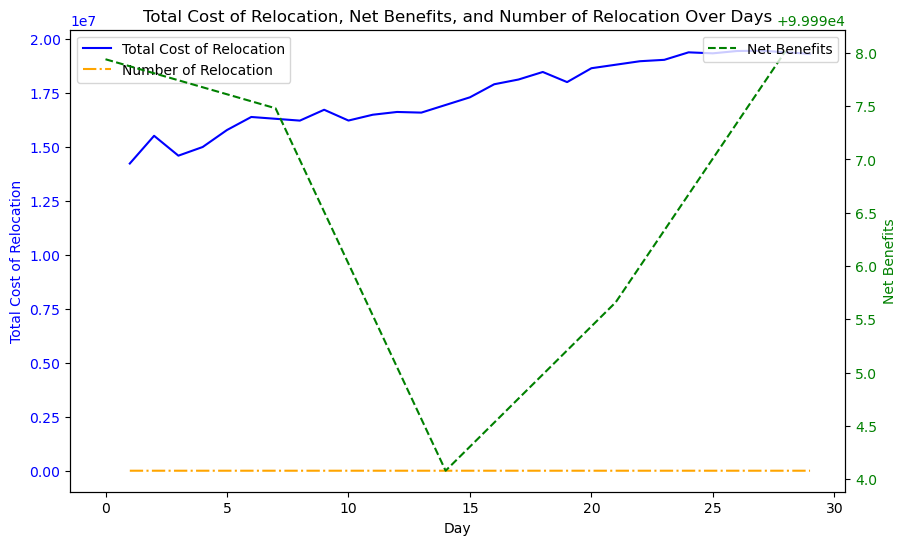

In [15]:
df = pd.DataFrame.from_dict(daily_log, orient='index')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total_Cost_of_Relocation on the primary y-axis
ax1.plot(df.index, df['Total_Cost_of_Relocation'], color='blue', label='Total Cost of Relocation')
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Cost of Relocation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Net_Benifits on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['Net_Benifits'], color='green', label='Net Benefits', linestyle='--')
ax2.set_ylabel('Net Benefits', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Plot Number_of_Relocation on the primary y-axis
ax1.plot(df.index, df['Number_of_Relocation'], color='orange', label='Number of Relocation', linestyle='-.')

# Adding legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.title('Total Cost of Relocation, Net Benefits, and Number of Relocation Over Days')
plt.show()